# Student Feedback Analysis Notebook

This notebook analyzes student feedback data from a CSV file containing numerical ratings. We will clean the data, preprocess it, visualize trends, perform sentiment analysis based on ratings, and create a word cloud for frequently occurring terms derived from the data.

## 1. Cleaning

First, we load the data and check for common issues like missing values, duplicates, or invalid entries. What specific cleaning steps do you think are necessary for a dataset with numerical ratings (e.g., handling missing values, checking for out-of-range ratings)?


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load the CSV data
df = pd.read_csv('student_feedback.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Verify rating ranges (assuming 1-10 scale based on data)
rating_columns = df.columns[1:]  # Exclude Student ID
out_of_range = {}
for col in rating_columns:
    out_of_range[col] = df[(df[col] < 1) | (df[col] > 10)][col].count()
print("\nOut-of-range ratings (1-10 expected):")
print(out_of_range)

# Drop rows with missing values (if any)
df_cleaned = df.dropna()

# Save cleaned data
df_cleaned.to_csv('student_feedback_cleaned.csv', index=False)
print("\nCleaned data saved to 'student_feedback_cleaned.csv'")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-n

## 2. Preprocessing

Now we preprocess the data to make it suitable for analysis. This might include normalizing ratings or categorizing them into satisfaction levels. How would you categorize ratings to simplify analysis (e.g., grouping 1-10 into Low, Medium, High)? Let’s assume we categorize ratings as Low (1-4), Medium (5-7), and High (8-10).


In [4]:
# Categorize ratings into Low (1-4), Medium (5-7), High (8-10)
def categorize_rating(rating):
    if rating <= 4:
        return 'Low'
    elif rating <= 7:
        return 'Medium'
    else:
        return 'High'

# Apply categorization to rating columns
df_preprocessed = df_cleaned.copy()
for col in rating_columns:
    df_preprocessed[col + '_category'] = df_preprocessed[col].apply(categorize_rating)

# Display preprocessed data
print("Preprocessed data sample:")
print(df_preprocessed.head())

# Save preprocessed data
df_preprocessed.to_csv('student_feedback_preprocessed.csv', index=False)
print("Preprocessed data saved to 'student_feedback_preprocessed.csv'")


Preprocessed data sample:
   Unnamed: 0  Student ID  Well versed with the subject  \
0           0         340                             5   
1           1         253                             6   
2           2         680                             7   
3           3         806                             9   
4           4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   
3                                           6                     7   
4                                          10                     8   

   Degree of difficulty of assignments  Solves doubts willingly  \
0                                    6                        9   
1                                    6                    

## 3. Visualization

Let’s visualize the distribution of ratings and their categories to identify patterns. What types of visualizations (e.g., histograms, bar plots) do you think would best highlight satisfaction trends across the different feedback categories?


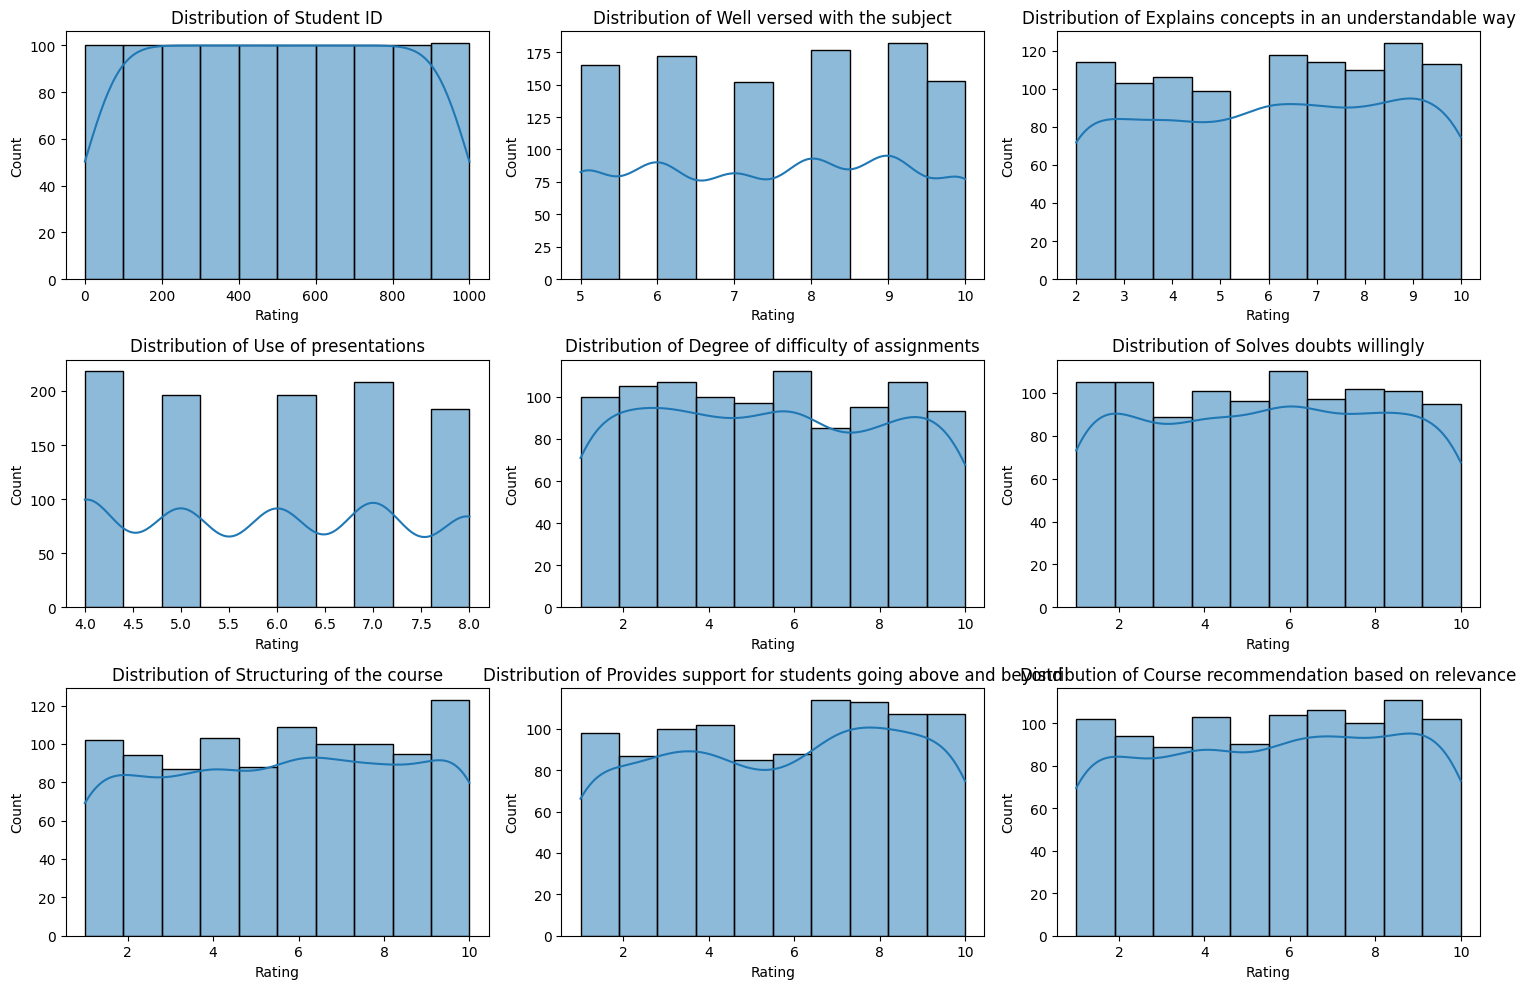

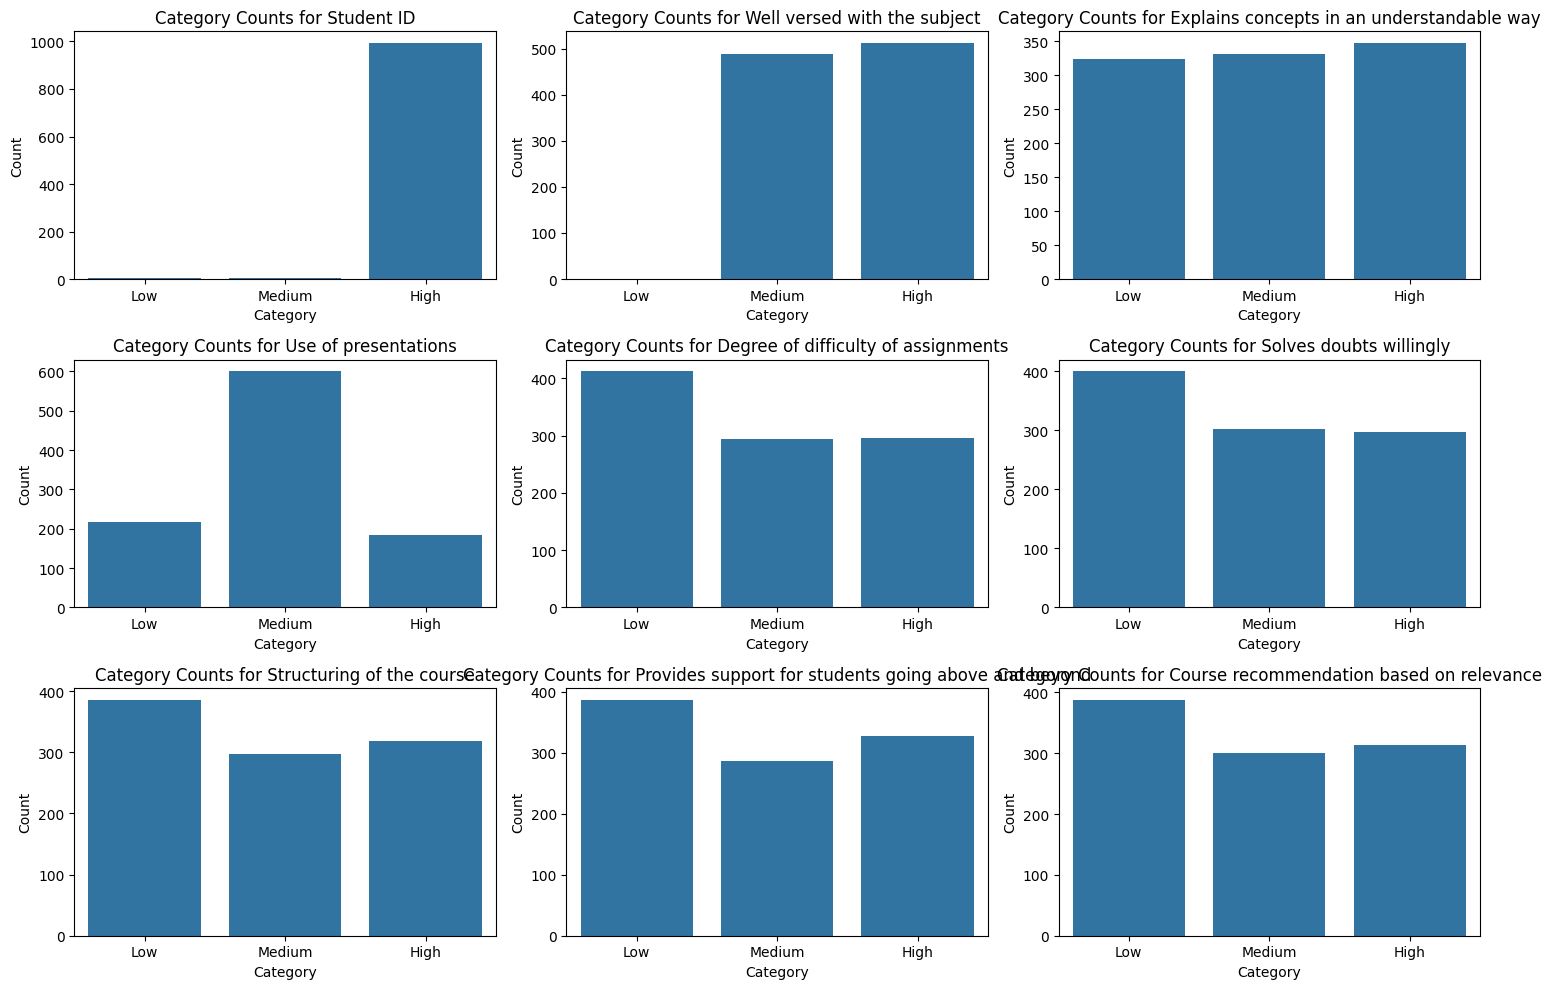

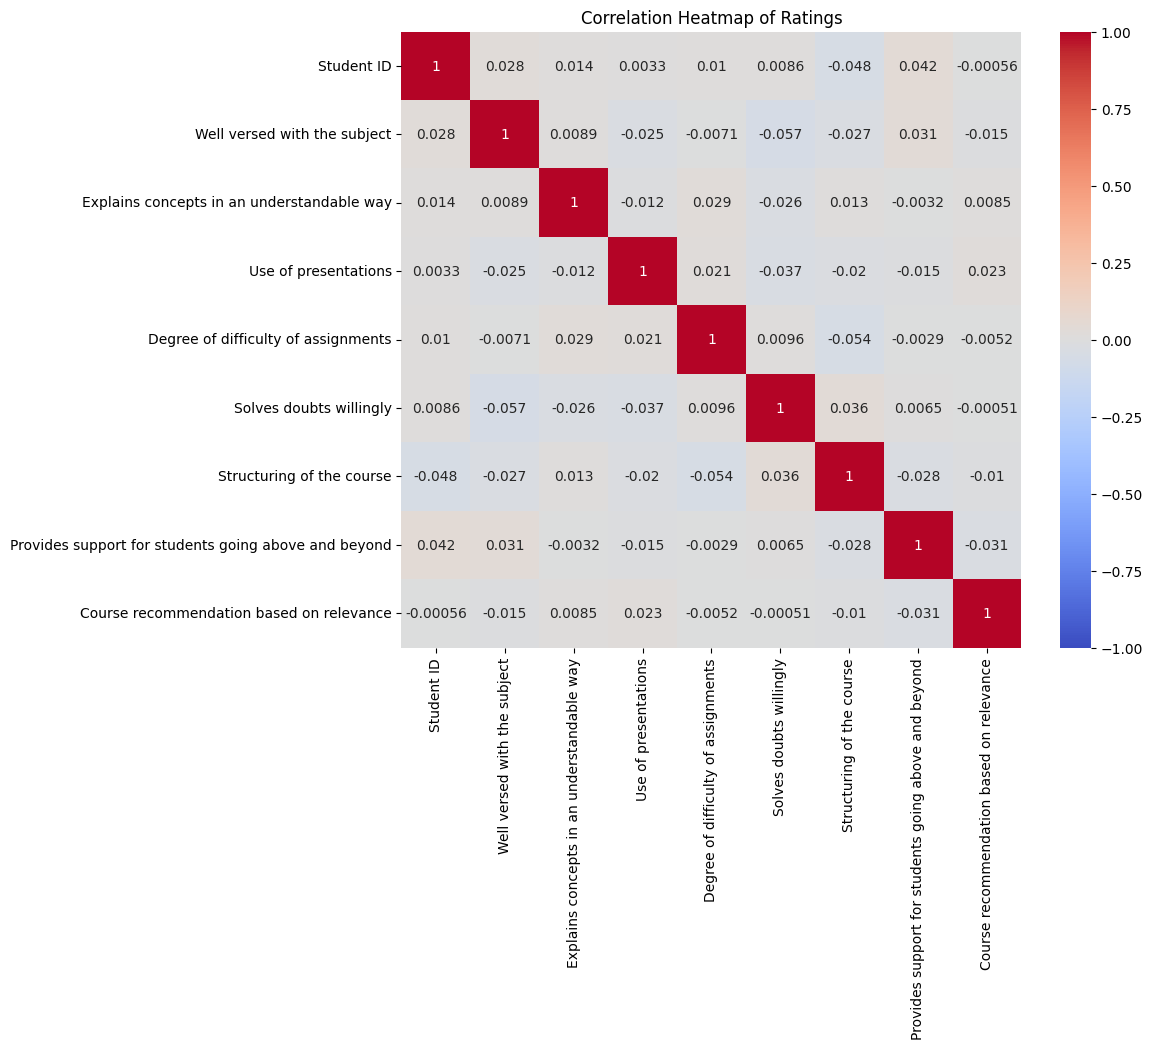

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style


# Plot distribution of ratings for each category
plt.figure(figsize=(15, 10))
for i, col in enumerate(rating_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_cleaned[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Rating')
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('rating_distributions.png')
plt.show()

# Plot category counts
plt.figure(figsize=(15, 10))
for i, col in enumerate(rating_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_preprocessed, x=col + '_category', order=['Low', 'Medium', 'High'])
    plt.title(f'Category Counts for {col}')
    plt.xlabel('Category')
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('category_counts.png')
plt.show()

# Correlation heatmap of ratings
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[rating_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Ratings')
plt.savefig('correlation_heatmap.png')
plt.show()


## 4. Sentiment Analysis

Since the dataset contains only numerical ratings, we’ll perform sentiment analysis by interpreting ratings as sentiment scores (e.g., 1-4: Negative, 5-7: Neutral, 8-10: Positive). How else might you interpret numerical ratings to gauge student satisfaction? Let’s calculate the average sentiment score per category.


In [9]:
# Define sentiment based on ratings
def sentiment_from_rating(rating):
    if rating <= 4:
        return 'Negative'
    elif rating <= 7:
        return 'Neutral'
    else:
        return 'Positive'

# Apply sentiment analysis
df_sentiment = df_cleaned.copy()
for col in rating_columns:
    df_sentiment[col + '_sentiment'] = df_sentiment[col].apply(sentiment_from_rating)

# Calculate sentiment distribution
sentiment_summary = {}
for col in rating_columns:
    sentiment_summary[col] = df_sentiment[col + '_sentiment'].value_counts()

# Display sentiment summary
print("Sentiment Distribution:")
for col, counts in sentiment_summary.items():
    print(f"\n{col}:")
    print(counts)

# Save sentiment analysis results
with open('sentiment_summary.txt', 'w') as f:
    for col, counts in sentiment_summary.items():
        f.write(f'{col}:\n')
        f.write(f'{counts}\n')

print("Sentiment summary saved to 'sentiment_summary.txt'")


Sentiment Distribution:

Student ID:
Student ID_sentiment
Positive    993
Negative      5
Neutral       3
Name: count, dtype: int64

Well versed with the subject:
Well versed with the subject_sentiment
Positive    512
Neutral     489
Name: count, dtype: int64

Explains concepts in an understandable way:
Explains concepts in an understandable way_sentiment
Positive    347
Neutral     331
Negative    323
Name: count, dtype: int64

Use of presentations:
Use of presentations_sentiment
Neutral     600
Negative    218
Positive    183
Name: count, dtype: int64

Degree of difficulty of assignments:
Degree of difficulty of assignments_sentiment
Negative    412
Positive    295
Neutral     294
Name: count, dtype: int64

Solves doubts willingly:
Solves doubts willingly_sentiment
Negative    400
Neutral     303
Positive    298
Name: count, dtype: int64

Structuring of the course:
Structuring of the course_sentiment
Negative    386
Positive    318
Neutral     297
Name: count, dtype: int64

Provides 

## 5. Word Cloud for Most Repeated Words

Since there are no text comments, we’ll create a word cloud based on the column names, weighted by the frequency of high ratings (8-10). What other terms or weights could we use to represent the data in a word cloud? For example, should we include all ratings or focus on specific sentiments?


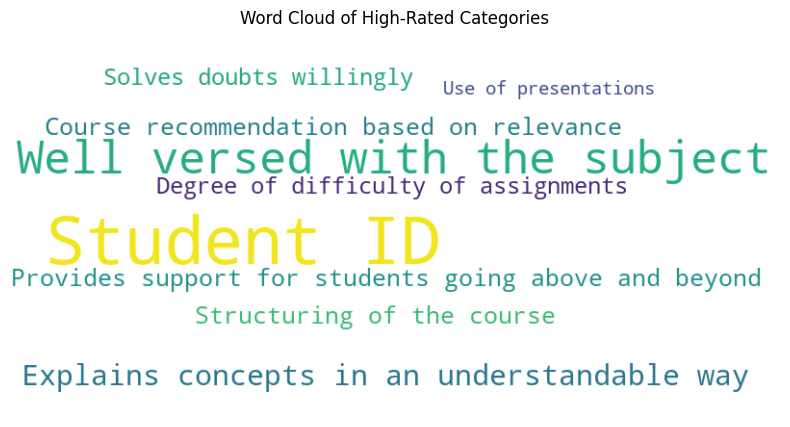

In [10]:
from wordcloud import WordCloud

# Calculate frequency of high ratings (8-10) for each category
high_rating_freq = {}
for col in rating_columns:
    high_rating_freq[col] = df_cleaned[df_cleaned[col] >= 8][col].count()

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(high_rating_freq)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of High-Rated Categories')
plt.savefig('wordcloud_high_ratings.png')
plt.show()


### Area's of Improvement
Enhance Doubt Resolution:

The aspect Solves doubts willingly received one of the lowest average ratings (5.47 out of 10).

Suggestion: Implement dedicated Q&A sessions, establish clear channels for students to submit questions (e.g., specific email, online forum monitored by instructors/TAs), and encourage instructors to actively solicit questions and provide thorough, patient explanations during sessions. Training for instructors on effective doubt-clearing techniques could also be beneficial.

Optimize Assignment Difficulty:

Degree of difficulty of assignments also scored low (5.43 out of 10).

Suggestion: Review assignment design to ensure they are appropriately challenging and align with learning objectives. Consider offering a range of assignment difficulties, providing more comprehensive guidelines, or offering optional review sessions/office hours specifically for assignment help. Feedback mechanisms for assignments could also be improved.

Improve Explanations and Presentations:

While not the lowest, "Explains concepts in an understandable way" (6.08) and "Use of presentations" (5.94) have room for improvement.

Suggestion: Encourage instructors/presenters to use diverse teaching methods, incorporate more real-world examples, and ensure presentations are visually engaging, well-structured, and not text-heavy. Incorporating interactive elements or breaks during longer sessions could also enhance understanding and engagement.

Strengthen Course Structuring:

Structuring of the course received a moderate rating (5.64).

Suggestion: Ensure course content flows logically, with clear transitions between topics. Provide a detailed syllabus or agenda upfront, and regularly recap previous sessions to reinforce learning and context.

Maintain Subject Matter Expertise:

Well versed with the subject received the highest rating (7.50).

Suggestion: Continue to prioritize selecting instructors and speakers who possess strong expertise in their respective subjects. This is a clear strength of the events/courses.

### Author : Divish Jindal